In [1]:
#import the required Libraries 

import glob
from skimage import io,transform
import matplotlib.pyplot as plt
import numpy as np
import os

In [13]:
#define the path of dataset

path="C:/Users/shara/Downloads/PollenDataset/PollenDataset/images"
print("Spiderman")
listdir=glob.glob(os.path.join(path,"*.jpg"))
print("Batman")

Spiderman
Batman


In [3]:
#define the function which will pre-process the images

def preprocess(imgpath):
    data=[]
    label=[]
    for i ,file in enumerate(imgpath):
       img=io.imread(file)
       img=transform.resize(img,(300,180))
       data.append(img)
       f=os.path.basename(file)
       
       if(os.path.splitext(f)[0][0]=="P"):
           label.append(1)
       else:
           label.append(0)

    return np.array(data),np.array(label)
print("Dresden")

Dresden


In [4]:
#define the architecture of the neural network

x,y=preprocess(listdir)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.9,shuffle=True)
from keras import layers
from keras import models
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dropout
from keras import optimizers
model=models.Sequential()
model.add(Conv2D(64,(3,3),activation="relu",input_shape=(300,180,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,kernel_size=(3,3),activation="relu"))
model.add(Conv2D(128,kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(256,kernel_size=(3,3),activation="relu"))
model.add(Conv2D(256,kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(layers.Dense(512,activation="relu"))
model.add(layers.Dense(1,activation="sigmoid"))
model.compile(optimizer=optimizers.Adam(),loss="binary_crossentropy",metrics=["acc"])
his=model.fit(xtrain,ytrain,epochs=150,batch_size=20)

Using TensorFlow backend.


Epoch 1/150
642/642 [==============================] - 89s 139ms/step - loss: 0.6978 - acc: 0.5109
Epoch 2/150
642/642 [==============================] - 80s 125ms/step - loss: 0.6979 - acc: 0.4844
Epoch 3/150
642/642 [==============================] - 84s 131ms/step - loss: 0.6929 - acc: 0.5202
Epoch 4/150
642/642 [==============================] - 86s 134ms/step - loss: 0.6881 - acc: 0.5623
Epoch 5/150
642/642 [==============================] - 84s 130ms/step - loss: 0.6977 - acc: 0.5218
Epoch 6/150
642/642 [==============================] - 85s 132ms/step - loss: 0.6873 - acc: 0.5654
Epoch 7/150
642/642 [==============================] - 84s 131ms/step - loss: 0.6856 - acc: 0.5436
Epoch 8/150
642/642 [==============================] - 91s 142ms/step - loss: 0.6955 - acc: 0.5047
Epoch 9/150
642/642 [==============================] - 85s 132ms/step - loss: 0.6930 - acc: 0.5343
Epoch 10/150
642/642 [==============================] - 83s 130ms/step - loss: 0.6869 - acc: 0.5125
Epoch 11/

In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 298, 178, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 149, 89, 64)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 147, 87, 64)       36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 73, 43, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 71, 41, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 35, 20, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 33, 18, 128)      

In [6]:
model.evaluate(xtest,ytest)

72/72 [==============================] - 3s 48ms/step


[0.6950556834538778, 0.4861111044883728]

In [7]:
acc=his.history["acc"]

In [8]:
import matplotlib.pyplot as plt

In [9]:
epochs=list(range(len(acc)))

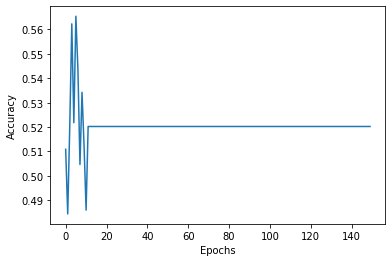

In [10]:
plt.plot(epochs,acc)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [11]:
model.save("Honey_Bee_Classification_model.h5")